# HumanActivityRecognition


In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
text = ""
features = []
with open('UCI HAR Dataset/features.txt') as f:
    text = f.read()
for line in text.split('\n'):
    if len(line) > 0:
        features.append(line)
        
print('No of Features: {}'.format(len(features)))


No of Features: 561


In [2]:
features

['1 tBodyAcc-mean()-X',
 '2 tBodyAcc-mean()-Y',
 '3 tBodyAcc-mean()-Z',
 '4 tBodyAcc-std()-X',
 '5 tBodyAcc-std()-Y',
 '6 tBodyAcc-std()-Z',
 '7 tBodyAcc-mad()-X',
 '8 tBodyAcc-mad()-Y',
 '9 tBodyAcc-mad()-Z',
 '10 tBodyAcc-max()-X',
 '11 tBodyAcc-max()-Y',
 '12 tBodyAcc-max()-Z',
 '13 tBodyAcc-min()-X',
 '14 tBodyAcc-min()-Y',
 '15 tBodyAcc-min()-Z',
 '16 tBodyAcc-sma()',
 '17 tBodyAcc-energy()-X',
 '18 tBodyAcc-energy()-Y',
 '19 tBodyAcc-energy()-Z',
 '20 tBodyAcc-iqr()-X',
 '21 tBodyAcc-iqr()-Y',
 '22 tBodyAcc-iqr()-Z',
 '23 tBodyAcc-entropy()-X',
 '24 tBodyAcc-entropy()-Y',
 '25 tBodyAcc-entropy()-Z',
 '26 tBodyAcc-arCoeff()-X,1',
 '27 tBodyAcc-arCoeff()-X,2',
 '28 tBodyAcc-arCoeff()-X,3',
 '29 tBodyAcc-arCoeff()-X,4',
 '30 tBodyAcc-arCoeff()-Y,1',
 '31 tBodyAcc-arCoeff()-Y,2',
 '32 tBodyAcc-arCoeff()-Y,3',
 '33 tBodyAcc-arCoeff()-Y,4',
 '34 tBodyAcc-arCoeff()-Z,1',
 '35 tBodyAcc-arCoeff()-Z,2',
 '36 tBodyAcc-arCoeff()-Z,3',
 '37 tBodyAcc-arCoeff()-Z,4',
 '38 tBodyAcc-correlation()

# Loading Train Data

In [18]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['Person No.'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Person No.,Activity,ActivityName
464,0.264846,0.006598,-0.112856,-0.45717,0.001901,-0.428382,-0.515652,-0.018921,-0.432471,-0.14653,...,0.282453,-0.32357,-0.04629,0.116217,-0.726355,0.26689,0.105178,3,1,WALKING


In [19]:
train.shape, y_train.shape

((7352, 564), (7352,))

# Loading Test Data

In [20]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['Person No.'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Person No.,Activity,ActivityName
187,0.2788,-0.015633,-0.106648,-0.995228,-0.986404,-0.983245,-0.996621,-0.986703,-0.984824,-0.933524,...,-0.280982,-0.340581,0.426251,0.091659,-0.666992,0.083944,-0.222873,2,4,SITTING


In [21]:
test.shape

(2947, 564)

# Data Cleaning

# 1. Checking for Duplicates

In [22]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [23]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


# 3. Changing the feature names

In [24]:
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['1 tBodyAccmeanX', '2 tBodyAccmeanY', '3 tBodyAccmeanZ',
       '4 tBodyAccstdX', '5 tBodyAccstdY', '6 tBodyAccstdZ', '7 tBodyAccmadX',
       '8 tBodyAccmadY', '9 tBodyAccmadZ', '10 tBodyAccmaxX',
       ...
       '555 angletBodyAccMeangravity', '556 angletBodyAccJerkMeangravityMean',
       '557 angletBodyGyroMeangravityMean',
       '558 angletBodyGyroJerkMeangravityMean', '559 angleXgravityMean',
       '560 angleYgravityMean', '561 angleZgravityMean', 'Person No.',
       'Activity', 'ActivityName'],
      dtype='object', length=564)

In [25]:
train.to_csv('UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

# Check for data imbalance

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

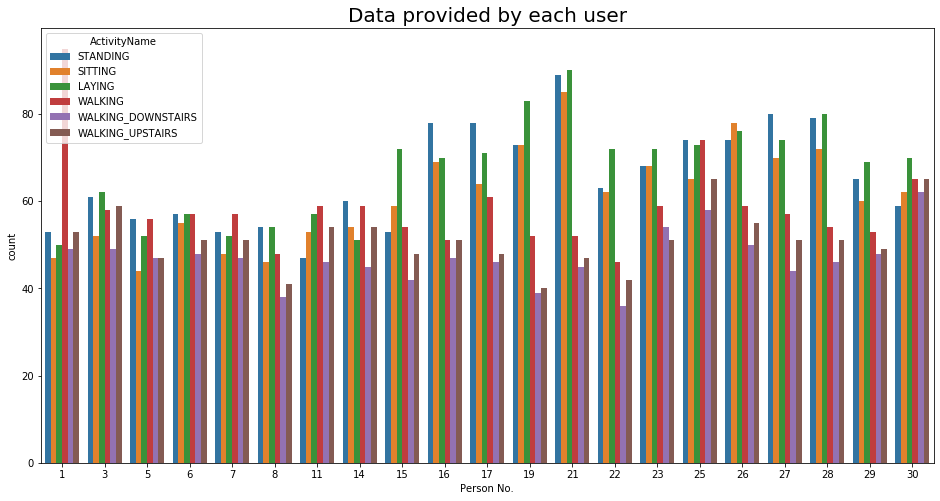

In [27]:
# Count Plot for each person
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='Person No.',hue='ActivityName', data = train)
plt.show()

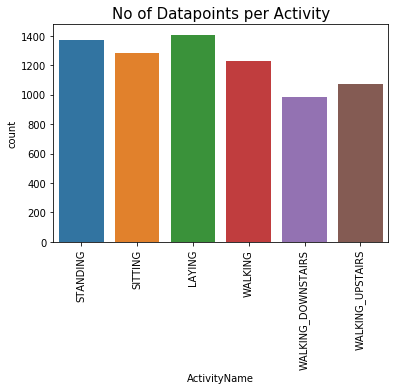

In [28]:
# Plot for count 
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

# Apply t-sne on the data 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.manifold import TSNE

In [31]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.265s...
[t-SNE] Computed neighbors for 7352 samples in 38.637s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.035s
[t-SNE] Iteration 50: error = 124.6480637, gradient norm = 0.0286485 (50 iterations in 3.787s)
[t-SNE] Iteration 100: error = 106.9407120, gradient norm = 0.0274665 (50 iterations in

/home/vinit/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


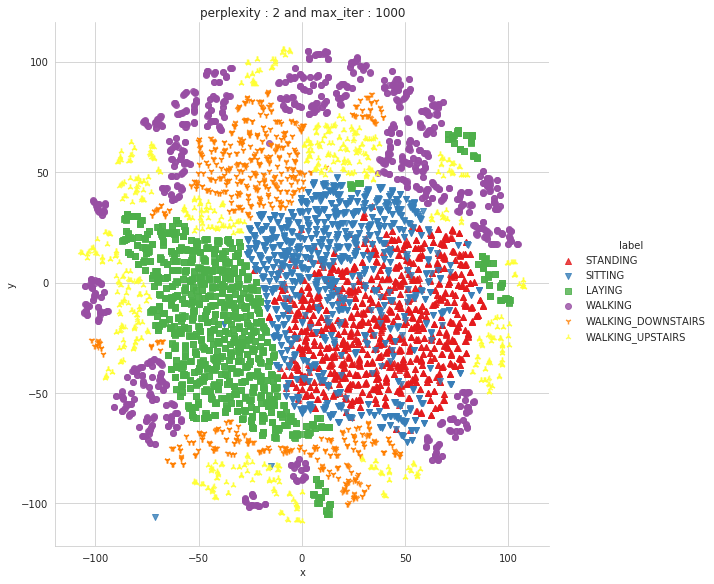

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.168s...
[t-SNE] Computed neighbors for 7352 samples in 35.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.057s
[t-SNE] Iteration 50: error = 114.0760651, gradient norm = 0.0220567 (50 iterations in 5.706s)
[t-SNE] Iteration 100: error = 97.8034821, gradient norm = 0.0157666 (50 iteratio

/home/vinit/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


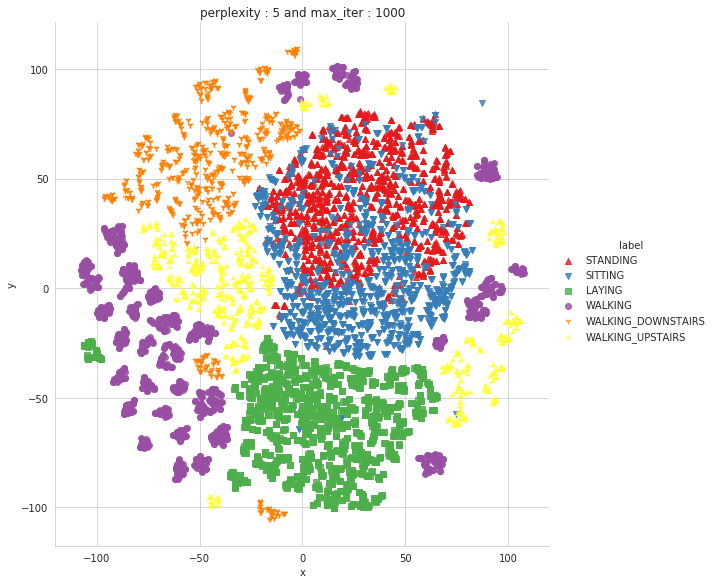

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.175s...
[t-SNE] Computed neighbors for 7352 samples in 35.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.105s
[t-SNE] Iteration 50: error = 105.9070282, gradient norm = 0.0188590 (50 iterations in 3.107s)
[t-SNE] Iteration 100: error = 90.4102936, gradient norm = 0.0115202 (50 iterati

/home/vinit/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


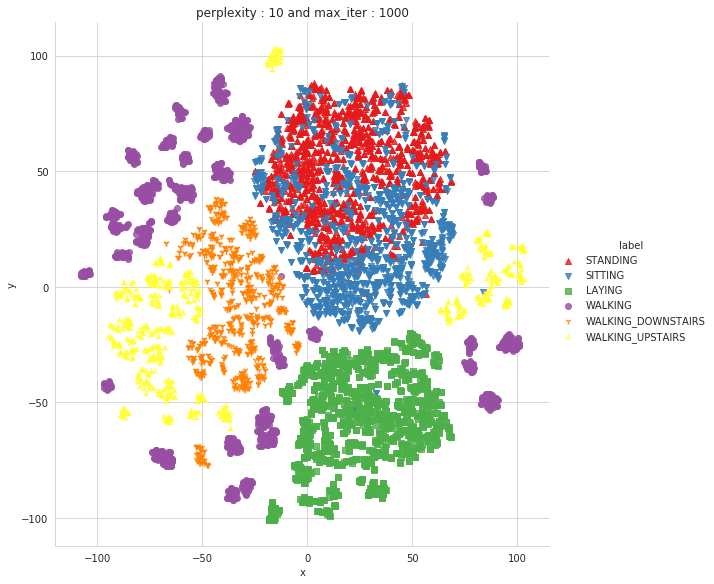

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.168s...
[t-SNE] Computed neighbors for 7352 samples in 35.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.205s
[t-SNE] Iteration 50: error = 97.9779434, gradient norm = 0.0116641 (50 iterations in 3.443s)
[t-SNE] Iteration 100: error = 84.7238617, gradient norm = 0.0078478 (50 iteratio

/home/vinit/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


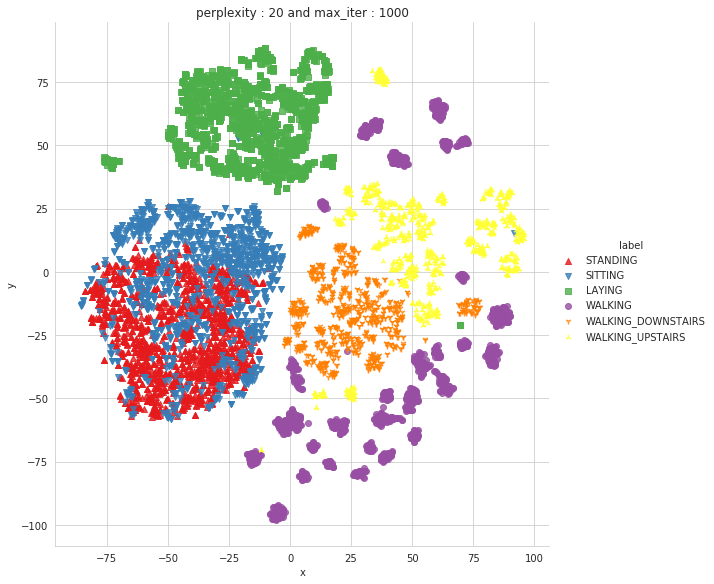

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.168s...
[t-SNE] Computed neighbors for 7352 samples in 39.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.498s
[t-SNE] Iteration 50: error = 86.9804382, gradient norm = 0.0146098 (50 iterations in 3.617s)
[t-SNE] Iteration 100: error = 75.5920944, gradient norm = 0.0040109 (50 iterati

/home/vinit/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


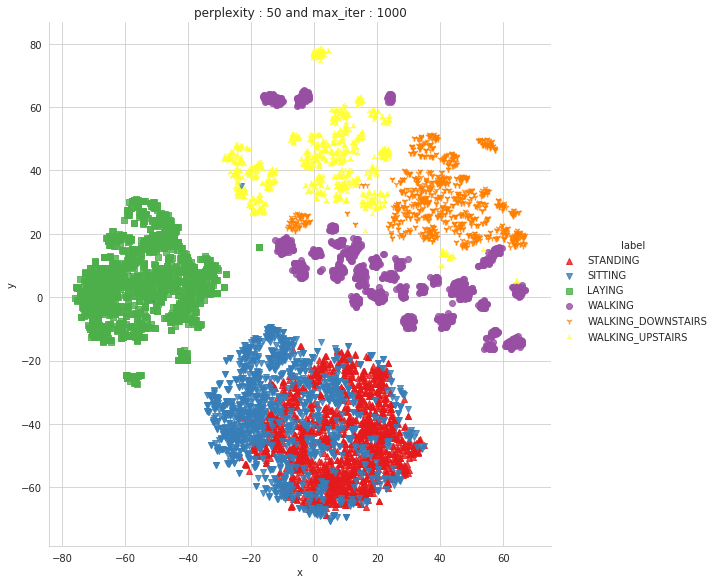

Done


In [125]:
X_pre_tsne = train.drop(['Person No.', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_pre_tsne,y_pre_tsne, perplexities =[2,5,10,20,50])